In [1]:
import pandas as pd
import numpy as np
import pdb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import folium
from folium.plugins import HeatMap

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!ls drive/My\ Drive/Save\ the\ Children/unhcr.csv

'drive/My Drive/Save the Children/unhcr.csv'


In [4]:
import_path = 'drive/My Drive/Save the Children/unhcr.csv'
demographics_df = pd.read_csv(import_path)
demographics_df.head()

,Year,Country of Origin Code,Country of Asylum Code,Country of Origin Name,Country of Asylum Name,Population Type,location,urbanRural,accommodationType,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60 or more,Female Unknown,Female Total,Male 0-4,Male 5-11,Male 12-17,Male 18-59,Male 60 or more,Male Unknown,Male Total,Total
0,#date+year,#country+code+origin,#country+code+asylum,#country+name+origin,#country+name+asylum,#indicator+population_type,NaN,NaN,NaN,#affected+f+infants+age_0_4,#affected+f+children+age_5_11,#affected+f+adolescents+age_12_17,#affected+f+adults+age_18_59,#affected+f+elderly+age_60,#affected+f+unknown_age,#affected+f+total,#affected+m+infants+age_0_4,#affected+m+children+age_5_11,#affected+m+adolescents+age_12_17,#affected+m+adults+age_18_59,#affected+m+elderly+age_60,#affected+m+unknown_age,#affected+m+total,#affected+all+total
1,2001,AFG,AFG,Afghanistan,Afghanistan,IDP,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1200000
2,2001,AFG,AFG,Afghanistan,Afghanistan,RET,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26092
3,2001,AFG,EGY,Afghanistan,Egypt,ASY,NaN,NaN,NaN,0,0,0,0,0,5,5,0,0,0,0,0,16,16,21
4,2001,AFG,EGY,Afghanistan,Egypt,REF,NaN,NaN,NaN,5,0,0,9,0,0,14,5,0,0,42,0,5,52,66


In [6]:
demographics_df = demographics_df.drop(demographics_df.index[0])

In [ ]:
demographics_df.head()

,Year,Country of Origin Code,Country of Asylum Code,Country of Origin Name,Country of Asylum Name,Population Type,location,urbanRural,accommodationType,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60 or more,Female Unknown,Female Total,Male 0-4,Male 5-11,Male 12-17,Male 18-59,Male 60 or more,Male Unknown,Male Total,Total
1,2001,AFG,AFG,Afghanistan,Afghanistan,IDP,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1200000
2,2001,AFG,AFG,Afghanistan,Afghanistan,RET,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26092
3,2001,AFG,EGY,Afghanistan,Egypt,ASY,NaN,NaN,NaN,0,0,0,0,0,5,5,0,0,0,0,0,16,16,21
4,2001,AFG,EGY,Afghanistan,Egypt,REF,NaN,NaN,NaN,5,0,0,9,0,0,14,5,0,0,42,0,5,52,66
5,2001,AFG,ARG,Afghanistan,Argentina,ASY,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
demographics_df = demographics_df.drop(columns=['Country of Origin Code', 'Country of Asylum Code', 'Country of Origin Name', 'location', 'urbanRural', 'accommodationType'])

In [ ]:
demographics_df.head()

,Year,Country of Asylum Name,Population Type,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60 or more,Female Unknown,Female Total,Male 0-4,Male 5-11,Male 12-17,Male 18-59,Male 60 or more,Male Unknown,Male Total,Total
1,2001,Afghanistan,IDP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1200000
2,2001,Afghanistan,RET,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26092
3,2001,Egypt,ASY,0,0,0,0,0,5,5,0,0,0,0,0,16,16,21
4,2001,Egypt,REF,5,0,0,9,0,0,14,5,0,0,42,0,5,52,66
5,2001,Argentina,ASY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
demographics_df.columns

Index(['Year', 'Country of Asylum Name', 'Population Type', 'Female 0-4',
       'Female 5-11', 'Female 12-17', 'Female 18-59', 'Female 60 or more',
       'Female Unknown', 'Female Total', 'Male 0-4', 'Male 5-11', 'Male 12-17',
       'Male 18-59', 'Male 60 or more', 'Male Unknown', 'Male Total', 'Total'],
      dtype='object')

In [ ]:
# Cleaning data

def clean_convert_unhcr_data(col):
    '''Clean mislabeled data for demographic levels
    '''
    demographics_df[col] = demographics_df[col].fillna(0).replace('1e+05', 100000).astype(int)
columns = ['Female 0-4','Female 5-11', 'Female 12-17', 'Female 18-59', 'Female 60 or more',
       'Female Unknown', 'Female Total', 'Male 0-4', 'Male 5-11', 'Male 12-17',
       'Male 18-59', 'Male 60 or more', 'Male Unknown', 'Male Total', 'Total']
for col in columns:
    clean_convert_unhcr_data(col)
demographics_df["Year"] = pd.to_numeric(demographics_df["Year"])




In [ ]:
print(demographics_df.dtypes)

Year                      object
Country of Asylum Name    object
Population Type           object
Female 0-4                 int64
Female 5-11                int64
Female 12-17               int64
Female 18-59               int64
Female 60 or more          int64
Female Unknown             int64
Female Total               int64
Male 0-4                   int64
Male 5-11                  int64
Male 12-17                 int64
Male 18-59                 int64
Male 60 or more            int64
Male Unknown               int64
Male Total                 int64
Total                      int64
dtype: object


In [ ]:
demographics_df["Year"] = pd.to_numeric(demographics_df["Year"])


In [ ]:
demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2851 entries, 1 to 2851
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    2851 non-null   int64 
 1   Country of Asylum Name  2851 non-null   object
 2   Population Type         2851 non-null   object
 3   Female 0-4              2851 non-null   int64 
 4   Female 5-11             2851 non-null   int64 
 5   Female 12-17            2851 non-null   int64 
 6   Female 18-59            2851 non-null   int64 
 7   Female 60 or more       2851 non-null   int64 
 8   Female Unknown          2851 non-null   int64 
 9   Female Total            2851 non-null   int64 
 10  Male 0-4                2851 non-null   int64 
 11  Male 5-11               2851 non-null   int64 
 12  Male 12-17              2851 non-null   int64 
 13  Male 18-59              2851 non-null   int64 
 14  Male 60 or more         2851 non-null   int64 
 15  Male

In [ ]:
print(demographics_df.columns)

Index(['Year', 'Country of Asylum Name', 'Population Type', 'Female 0-4',
       'Female 5-11', 'Female 12-17', 'Female 18-59', 'Female 60 or more',
       'Female Unknown', 'Female Total', 'Male 0-4', 'Male 5-11', 'Male 12-17',
       'Male 18-59', 'Male 60 or more', 'Male Unknown', 'Male Total', 'Total'],
      dtype='object')


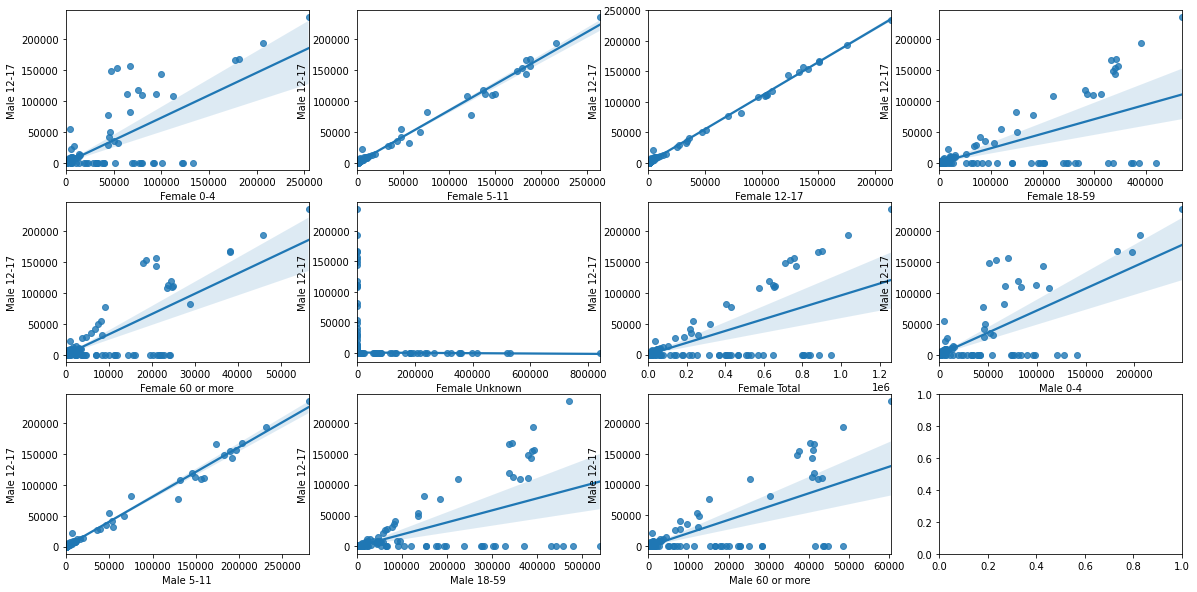

In [ ]:
#Plot the three features with the highest correlations
# demographics_df.plot(kind="scatter", x="Year", y="Female 0-4")
from sklearn import preprocessing
import seaborn as sns
#scale the data before plotting
std_scaler = preprocessing.StandardScaler()
column_corr = ['Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59', 'Female 60 or more', 'Female Unknown', 'Female Total', 'Male 0-4', 'Male 5-11', 'Male 18-59', 'Male 60 or more']
x_axis = demographics_df.loc[:,column_corr]
y_axis = demographics_df['Male 12-17']
# x_axis = pd.DataFrame(data=std_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_corr):
    sns.regplot(x=k, y='Male 12-17', data=demographics_df, ax=axs[i])

In [ ]:
corr_matrix = demographics_df.corr()

In [ ]:
print(corr_matrix)

                       Year  Female 0-4  ...  Male Total     Total
Year               1.000000    0.024000  ...    0.000743 -0.007852
Female 0-4         0.024000    1.000000  ...    0.864408  0.822965
Female 5-11        0.077394    0.759610  ...    0.693733  0.638738
Female 12-17       0.077339    0.770358  ...    0.692978  0.639719
Female 18-59       0.012152    0.888620  ...    0.952040  0.887828
Female 60 or more  0.027827    0.951110  ...    0.909781  0.855112
Female Unknown    -0.078142    0.345761  ...    0.647040  0.614289
Female Total       0.000666    0.890247  ...    0.993153  0.930939
Male 0-4           0.024046    0.999022  ...    0.870421  0.826723
Male 5-11          0.077823    0.758647  ...    0.693692  0.638405
Male 12-17         0.078222    0.768802  ...    0.693270  0.639382
Male 18-59         0.011529    0.830860  ...    0.945152  0.864547
Male 60 or more    0.022366    0.893669  ...    0.946186  0.876542
Male Unknown      -0.076259    0.336626  ...    0.647041  0.61

In [ ]:
corr_matrix["Male 12-17"].sort_values(ascending=False)

Male 12-17           1.000000
Female 12-17         0.998967
Female 5-11          0.995297
Male 5-11            0.994735
Female 60 or more    0.808396
Male 0-4             0.770093
Female 0-4           0.768802
Male 60 or more      0.763455
Female 18-59         0.715831
Female Total         0.709028
Male Total           0.693270
Male 18-59           0.677522
Total                0.639382
Year                 0.078222
Female Unknown      -0.007620
Male Unknown        -0.007659
Name: Male 12-17, dtype: float64

In [ ]:
corr_matrix["Female 12-17"].sort_values(ascending=False)

Female 12-17         1.000000
Male 12-17           0.998967
Female 5-11          0.995380
Male 5-11            0.994569
Female 60 or more    0.811675
Male 0-4             0.771522
Female 0-4           0.770358
Male 60 or more      0.765797
Female 18-59         0.716329
Female Total         0.709748
Male Total           0.692978
Male 18-59           0.676405
Total                0.639719
Year                 0.077339
Female Unknown      -0.007506
Male Unknown        -0.007544
Name: Female 12-17, dtype: float64

In [ ]:
corr_matrix["Female 5-11"].sort_values(ascending=False)

Female 5-11          1.000000
Male 5-11            0.999448
Female 12-17         0.995380
Male 12-17           0.995297
Female 60 or more    0.797665
Male 60 or more      0.764590
Male 0-4             0.761482
Female 0-4           0.759610
Female 18-59         0.718882
Female Total         0.708940
Male Total           0.693733
Male 18-59           0.680800
Total                0.638738
Year                 0.077394
Female Unknown      -0.007575
Male Unknown        -0.007614
Name: Female 5-11, dtype: float64

In [ ]:
corr_matrix["Male 5-11"].sort_values(ascending=False)

Male 5-11            1.000000
Female 5-11          0.999448
Male 12-17           0.994735
Female 12-17         0.994569
Female 60 or more    0.796838
Male 60 or more      0.764272
Male 0-4             0.759721
Female 0-4           0.758647
Female 18-59         0.718602
Female Total         0.708471
Male Total           0.693692
Male 18-59           0.681250
Total                0.638405
Female Unknown      -0.007579
Male Unknown        -0.007617
Name: Male 5-11, dtype: float64

In [ ]:
corr_matrix["Female 60 or more"].sort_values(ascending=False)

Female 60 or more    1.000000
Male 60 or more      0.960718
Female 0-4           0.951110
Male 0-4             0.950700
Female 18-59         0.946563
Female Total         0.926106
Male Total           0.909781
Male 18-59           0.903933
Total                0.855112
Female 12-17         0.811675
Male 12-17           0.808396
Female 5-11          0.797665
Male 5-11            0.796838
Female Unknown       0.361737
Male Unknown         0.354914
Name: Female 60 or more, dtype: float64

# Data Preparation for Model

In [ ]:
def indices(x):
    y = []
    for i in range(x):
        y.append(i)
    return y

In [ ]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, train_ratio):
    """An simple implementation of the spliting into train and test sets"""
    #shuffled_indices = np.random.permutation(len(data)) # Give it random indexes
    shuffled_indices = indices(len(data))
    train_set_size = int(len(data) * train_ratio) # split into ratio
    test_indices = shuffled_indices[train_set_size:] # extract index of test examples
    train_indices = shuffled_indices[:train_set_size] # extract index of train examples
    return data.iloc[train_indices], data.iloc[test_indices] # return the splited data

In [ ]:
demographics_df_model = demographics_df.copy()

In [ ]:
demographics_df_model = demographics_df_model.sort_values(by=['Year'])

In [ ]:
train_set, test_set = split_train_test(demographics_df_model, 0.8)
len(train_set)
print(train_set.shape)

(2280, 18)


In [ ]:
len(test_set)
print(test_set.shape)

(571, 18)


In [ ]:
print(train_set)

      Year Country of Asylum Name  ... Male Total    Total
1     2001            Afghanistan  ...          0  1200000
97    2001           South Africa  ...          0        5
96    2001                Romania  ...         71      294
95    2001                  Qatar  ...         40       40
94    2001               Portugal  ...          0        5
...    ...                    ...  ...        ...      ...
2209  2016             Kazakhstan  ...         45       87
2210  2016             Kazakhstan  ...        322      599
2211  2016                  Kenya  ...          8        8
2212  2016             Kyrgyzstan  ...         41       72
2213  2016             Kyrgyzstan  ...        110      242

[2280 rows x 18 columns]


In [ ]:
print(test_set)

      Year              Country of Asylum Name  ... Male Total  Total
2214  2016                   Republic of Korea  ...         10     10
2195  2016                               India  ...       3673   7693
2194  2016                               India  ...       2172   4255
2202  2016                                Iraq  ...         47    104
2175  2016                             Finland  ...          0    986
...    ...                                 ...  ...        ...    ...
2728  2019                              Greece  ...      16823  27608
2729  2019                              Greece  ...          0  17685
2730  2019                               Haiti  ...          0      0
2721  2019                              France  ...      22030  24293
2851  2019  Venezuela (Bolivarian Republic of)  ...          5     10

[571 rows x 18 columns]


In [ ]:
print(train_set.columns)

Index(['Year', 'Country of Asylum Name', 'Population Type', 'Female 0-4',
       'Female 5-11', 'Female 12-17', 'Female 18-59', 'Female 60 or more',
       'Female Unknown', 'Female Total', 'Male 0-4', 'Male 5-11', 'Male 12-17',
       'Male 18-59', 'Male 60 or more', 'Male Unknown', 'Male Total', 'Total'],
      dtype='object')


In [ ]:

# Create the features and labels for training

demo_year = train_set.drop(['Country of Asylum Name', 'Population Type', 'Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59', 'Female 60 or more', 'Female Unknown',
                                'Male 0-4', 'Male 5-11', 'Male 12-17', 'Male 18-59', 'Male 60 or more', 'Male Unknown', 'Male Total', 'Total', 'Year'], axis = 1)
demo_year_labels = train_set["Year"].copy()

In [ ]:

# num_pipeline only requires standardization of data, so technically, there is nothing
#    else in the sequence and we could have just used the standard scalar function on 
#    its own but it is made here for consistency with the notes from class. 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

demographics_prepared = num_pipeline.fit_transform(demo_year)

In [ ]:

# Check to see if the shapes match
print(demo_year.shape)
print(demographics_prepared.shape)

(2280, 1)
(2280, 1)


In [ ]:

def display_scores(scores):
  '''
  :param scores: root mean squared scores outputted from each model
  '''
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

# Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


lin_reg = LinearRegression()
lin_reg.fit(demographics_prepared, demo_year_labels)
demo_predictions = lin_reg.predict(demographics_prepared)
lin_mse = mean_squared_error(demo_year_labels, demo_predictions)
lin_rmse = np.sqrt(lin_mse)
#The rmse value is evaluated from the train set so it will be lower than the cross val score
lin_rmse

4.6583348797276525

In [ ]:

lin_scores = cross_val_score(lin_reg, demographics_prepared, demo_year_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [8.45876891 4.12527822 1.1128122  4.3725356  7.61194009]
Mean: 5.1362670038495
Standard deviation: 2.6442975898480094


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(demographics_prepared, demo_year_labels)

demo_predictions = tree_reg.predict(demographics_prepared)
tree_mse = mean_squared_error(demo_year_labels, demo_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.267227232517522

In [ ]:
scores = cross_val_score(tree_reg, demographics_prepared, demo_year_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [8.71940987 4.63059291 2.51558171 4.84222359 7.73995051]
Mean: 5.689551718272703
Standard deviation: 2.249338565831101


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(demographics_prepared, demo_year_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:

demo_predictions = forest_reg.predict(demographics_prepared)
forest_mse = mean_squared_error(demo_year_labels, demo_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

4.324633278205662

In [ ]:
forest_scores = cross_val_score(forest_reg, demographics_prepared, demo_year_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [8.67080945 4.46151482 2.04099284 4.60793659 7.64596679]
Mean: 5.48544409785093
Standard deviation: 2.387346048451039


# SVR

In [ ]:

from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_reg.fit(demographics_prepared, demo_year_labels)

demo_predictions = svr_reg.predict(demographics_prepared)
svr_mse = mean_squared_error(demo_year_labels, demo_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

4.65055413347608

In [ ]:
svr_scores = cross_val_score(svr_reg, demographics_prepared, demo_year_labels,
                             scoring="neg_mean_squared_error", cv=5)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores: [8.71840918 5.3333745  1.7192302  4.60505746 7.18886392]
Mean: 5.5129870521537
Standard deviation: 2.3804403870506983


# Gradient Booster Regressor

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

gbr_reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, min_samples_leaf=5, random_state=42)
gbr_reg.fit(demographics_prepared, demo_year_labels)

demo_predictions = gbr_reg.predict(demographics_prepared)
gbr_mse = mean_squared_error(demo_year_labels, demo_predictions)
gbr_rmse = np.sqrt(gbr_mse)
gbr_rmse

4.505660634098943

In [ ]:

scores = cross_val_score(gbr_reg, demographics_prepared, demo_year_labels, cv=5, scoring='neg_mean_squared_error')
gbr_rmse_scores = np.sqrt(-scores)
display_scores(gbr_rmse_scores)

Scores: [8.52853266 4.18883764 1.47711037 4.44680428 7.59950579]
Mean: 5.248158146047871
Standard deviation: 2.540662196757562


In [ ]:
final_model = grid_search.best_estimator_

#X_test = test_set.drop("MEDV", axis=1)
X_test = test_set.drop(['Country of Asylum Name', 'Population Type', 'Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59', 'Female 60 or more', 'Female Unknown',
                                'Male 0-4', 'Male 5-11', 'Male 12-17', 'Male 18-59', 'Male 60 or more', 'Male Unknown', 'Male Total', 'Total', 'Year'], axis = 1)
y_test = test_set["Year"].copy()

X_test_prepared = num_pipeline.fit_transform(X_test)
final_predictions = tree_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

4.799846757623883